<a href="https://colab.research.google.com/github/MaggieJian/Week4/blob/main/Chapter1_Unsupervised_Learning_Methods_20018568.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

This section marks our journey into another significant domain of machine learning and AI: unsupervised learning. Rather than delving deep into theoretical intricacies, our focus here will be on offering a practical guide. We aim to equip you with a clear understanding and effective tools for employing unsupervised learning methods in real-world (EO) scenarios.

It's important to note that, while unsupervised learning encompasses a broad range of applications, our discussion will predominantly revolve around classification tasks. This is because unsupervised learning techniques are exceptionally adept at identifying patterns and categorising data when the classifications are not explicitly labeled. By exploring these techniques, you'll gain insights into how to discern structure and relationships within your datasets, even in the absence of predefined categories or labels.

The tasks in this notebook will be mainly two:
1. Discrimination of Sea ice and lead based on image classification based on Sentinel-2 optical data.
2. Discrimination of Sea ice and lead based on altimetry data classification based on Sentinel-3 altimetry data.

# List of Contents

1. Introduction to Unsupervised Learning Methods
2. Gaussian Mixture Models (GMM)
3. Image Classification
4. Altimetry Classification
5. Experimental plotting
6. Confusion Matrix
7. Plot the averages

## 1. Introduction to Unsupervised Learning Methods

### Introduction to K-means Clustering

K-means clustering is a type of unsupervised learning algorithm used for partitioning a dataset into a set of k groups (or clusters), where k represents the number of groups pre-specified by the analyst. It classifies the data points based on the similarity of the features of the data. The basic idea is to define k centroids, one for each cluster, and then assign each data point to the nearest centroid, while keeping the centroids as small as possible.

### Why K-means for Clustering?

K-means clustering is particularly well-suited for applications where:

- **The structure of the data is not known beforehand**: K-means doesn’t require any prior knowledge about the data distribution or structure, making it ideal for exploratory data analysis.
- **Simplicity and scalability**: The algorithm is straightforward to implement and can scale to large datasets relatively easily.

### Key Components of K-means

1. **Choosing K**: The number of clusters (k) is a parameter that needs to be specified before applying the algorithm.
2. **Centroids Initialization**: The initial placement of the centroids can affect the final results.
3. **Assignment Step**: Each data point is assigned to its nearest centroid, based on the squared Euclidean distance.
4. **Update Step**: The centroids are recomputed as the center of all the data points assigned to the respective cluster.

### The Iterative Process of K-means

The assignment and update steps are repeated iteratively until the centroids no longer move significantly, meaning the within-cluster variation is minimised. This iterative process ensures that the algorithm converges to a result, which might be a local optimum.

### Advantages of K-means

- **Efficiency**: K-means is computationally efficient.
- **Ease of interpretation**: The results of k-means clustering are easy to understand and interpret.

### Basic Code Implementation

Below, you'll find a basic implementation of the K-means clustering algorithm. This serves as a foundational understanding and a starting point for applying the algorithm to your specific data analysis tasks.


In [2]:
# Mount your own Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


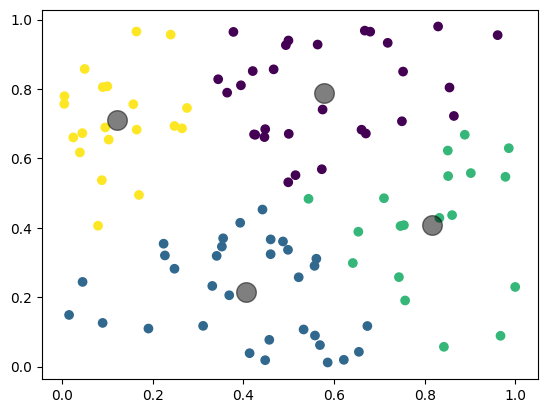

In [4]:
# Import packages for K-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Sample data randomly
X = np.random.rand(100, 2)

# Define K-means model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

## 2. Gaussian Mixture Models (GMM)

### Introduction to Gaussian Mixture Models

Gaussian Mixture Models (GMM) are a probabilistic model for representing normally distributed subpopulations within an overall population. The model assumes that the data is generated from a mixture of several Gaussian distributions, each with its own mean and variance. GMMs are widely used for clustering and density estimation, as they provide a method for representing complex distributions through the combination of simpler ones.

### Why Gaussian Mixture Models for Clustering?

Gaussian Mixture Models are particularly powerful in scenarios where:

- **Soft clustering is needed**: Unlike K-means, GMM provides the probability of each data point belonging to each cluster, offering a soft classification and understanding of the uncertainties in our data.
- **Flexibility in cluster covariance**: GMM allows for clusters to have different sizes and different shapes, making it more flexible to capture the true variance in the data.

### Key Components of GMM

1. **Number of Components (Gaussians)**: Similar to K in K-means, the number of Gaussians (components) is a parameter that needs to be set.
2. **Expectation-Maximization (EM) Algorithm**: GMMs use the EM algorithm for fitting, iteratively improving the likelihood of the data given the model.
3. **Covariance Type**: The shape, size, and orientation of the clusters are determined by the covariance type of the Gaussians (e.g., spherical, diagonal, tied, or full covariance).

### The EM Algorithm in GMM

The Expectation-Maximization (EM) algorithm is a two-step process:

- **Expectation Step (E-step)**: Calculate the probability that each data point belongs to each cluster.
- **Maximization Step (M-step)**: Update the parameters of the Gaussians (mean, covariance, and mixing coefficient) to maximize the likelihood of the data given these assignments.

This process is repeated until convergence, meaning the parameters do not significantly change from one iteration to the next.

### Advantages of GMM

- **Soft Clustering**: Provides a probabilistic framework for soft clustering, giving more information about the uncertainties in the data assignments.
- **Cluster Shape Flexibility**: Can adapt to ellipsoidal cluster shapes, thanks to the flexible covariance structure.

### Basic Code Implementation

Below, you'll find a basic implementation of the Gaussian Mixture Model. This should serve as an initial guide for understanding the model and applying it to your data analysis projects.


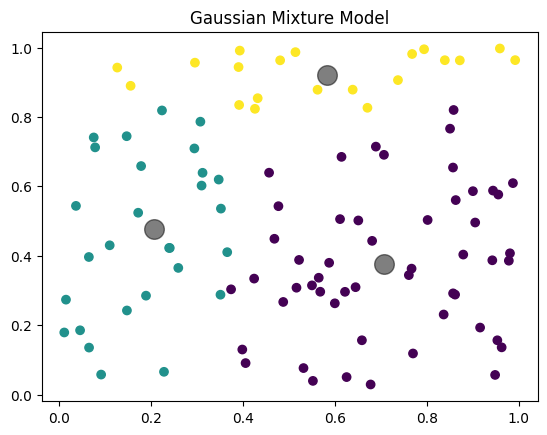

In [9]:
# Import packages for Gaussian Mixture
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Sample data randomly
X = np.random.rand(100, 2)

# Define the GMM model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_gmm = gmm.predict(X)

# Plot the above model
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis')
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Gaussian Mixture Model')
plt.show()

## 3. Image Classification
Now, let's explore the application of these unsupervised methods to image classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-2 imagery.

### 3a. K-Means Implementation

In [7]:
# Install pip and more packages for K-Means implementation
! pip install rasterio
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


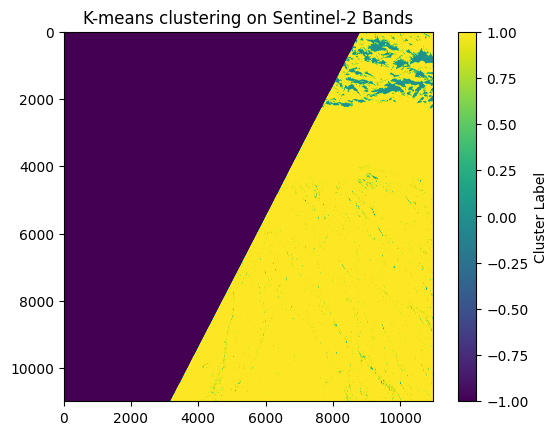

In [10]:
# Define you path and data by changing the section within the ' ' to the path to your data
base_path = "/content/drive/MyDrive/Week_4/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/" # You need to specify the path
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2',
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2',
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4', 'B3', 'B2']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for K-means, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 3))

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plot the result
plt.imshow(labels_image, cmap='viridis')
plt.title('K-means clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()

### 3b. GMM Implementation

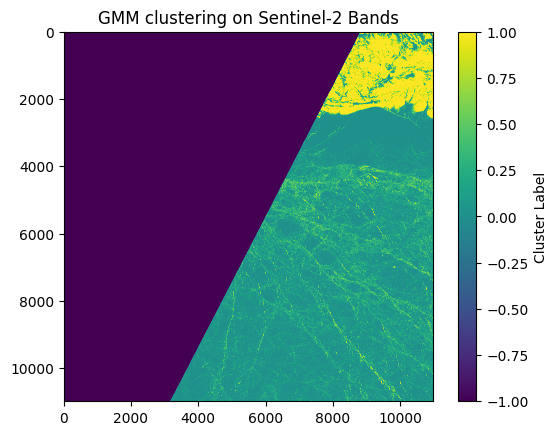

In [11]:
# Specify your paths to the band images
base_path = "/content/drive/MyDrive/Week_4/S2A_MSIL1C_20190301T235611_N0207_R116_T01WCU_20190302T014622.SAFE/GRANULE/L1C_T01WCU_A019275_20190301T235610/IMG_DATA/" # You need to specify the path
bands_paths = {
    'B4': base_path + 'T01WCU_20190301T235611_B04.jp2',
    'B3': base_path + 'T01WCU_20190301T235611_B03.jp2',
    'B2': base_path + 'T01WCU_20190301T235611_B02.jp2'
}

# Read and stack the band images
band_data = []
for band in ['B4', 'B3', 'B2']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for GMM, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 3))

# GMM clustering
gmm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels = gmm.predict(X)

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place GMM labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('GMM clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()

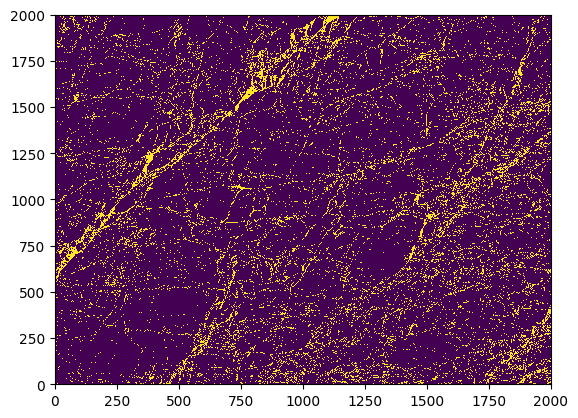

In [12]:
# As a checkpoint, plot a selected section of data
plt.pcolor(labels_image[8000:10000,8000:10000])

## 4. Altimetry Classification
Now, let's explore the application of these unsupervised methods to altimetry classification tasks, focusing specifically on distinguishing between sea ice and leads in Sentinel-3 altimetry dataset.

### Read in Functions Needed
Before delving into the modeling process, it's crucial to preprocess the data to ensure compatibility with our analytical models. This involves transforming the raw data into meaningful variables, such as peakniness and stack standard deviation (SSD), etc.

In [13]:
# Install netCDF4 for the altimetry classification
! pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.7 MB/s eta 0:00:00


In [14]:
# Import more library packages
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from scipy.interpolate import griddata
import numpy.ma as ma
import glob
from matplotlib.patches import Polygon
import scipy.spatial as spatial
from scipy.spatial import KDTree

import pyproj
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster


# Define several functions, stating conditions
# *args and **kwargs allow you to pass an unspecified number of arguments to a function,
# so when writing the function definition, you do not need to know how many arguments will be passed to your function
# **kwargs allows you to pass keyworded variable length of arguments to a function.
# You should use **kwargs if you want to handle named arguments in a function.
# double star allows us to pass through keyword arguments (and any number of them).
def peakiness(waves, **kwargs):

    "finds peakiness of waveforms."

    print("Running peakiness function...")

    size=np.shape(waves)[0] # .shape property is a tuple of length .ndim containing the length of each dimensions
                            # Tuple of array dimensions.

    waves1=np.copy(waves)

    if waves1.ndim == 1: # number of array dimensions
        print('only one waveform in file')
        waves2=waves1.reshape(1,np.size(waves1))
        waves1=waves2


    def by_row(waves, *args): # *args is used to send a non-keyworded variable length argument list to the function
        "calculate peakiness for each waveform"
        maximum=np.nanmax(waves)
        if maximum > 0:

            maximum_bin=np.where(waves==maximum)
            maximum_bin=maximum_bin[0][0]
            waves_128=waves[maximum_bin-50:maximum_bin+78]

            waves=waves_128

            noise_floor=np.nanmean(waves[10:20])
            where_above_nf=np.where(waves > noise_floor)

            if np.shape(where_above_nf)[1] > 0:
                maximum=np.nanmax(waves[where_above_nf])
                total=np.sum(waves[where_above_nf])
                mean=np.nanmean(waves[where_above_nf])
                peaky=maximum/mean

            else:
                peaky = np.nan
                maximum = np.nan
                total = np.nan

        else:
            peaky = np.nan
            maximum = np.nan
            total = np.nan

        if 'maxs' in args:
            return maximum
        if 'totals' in args:
            return total
        if 'peaky' in args:
            return peaky

    peaky=np.apply_along_axis(by_row, 1, waves1, 'peaky')

    if 'wf_plots' in kwargs:
        maximums=np.apply_along_axis(by_row, 1, waves1, 'maxs')
        totals=np.apply_along_axis(by_row, 1, waves1, 'totals')

        for i in range(0,kwargs['wf_plots']):
            if i == 0:
                print("Plotting first "+str(kwargs['wf_plots'])+" waveforms")

            plt.plot(waves1[i,:])
            plt.axhline(maximums[i], color='green')
            plt.axvline(10, color='r')
            plt.axvline(19, color='r')
            plt.xlabel('Bin (of 256)')
            plt.ylabel('Power')
            plt.text(5,maximums[i],"maximum="+str(maximums[i]))
            plt.text(5,maximums[i]-2500,"total="+str(totals[i]))
            plt.text(5,maximums[i]-5000,"peakiness="+str(peaky[i]))
            plt.title('waveform '+str(i)+' of '+str(size)+'\n. Noise floor average taken between red lines.')
            plt.show()


    return peaky

def unpack_gpod(variable):

    from scipy.interpolate import interp1d

    time_1hz=SAR_data.variables['time_01'][:]
    time_20hz=SAR_data.variables['time_20_ku'][:]
    time_20hzC = SAR_data.variables['time_20_c'][:]

    out=(SAR_data.variables[variable][:]).astype(float) # convert from integer array to float.

    out=np.ma.filled(out, np.nan)

    if len(out)==len(time_1hz):

        print(variable,'is 1hz. Expanding to 20hz...')
        out = interp1d(time_1hz,out,fill_value="extrapolate")(time_20hz)

    if len(out)==len(time_20hzC):
        print(variable, 'is c band, expanding to 20hz ku band dimension')
        out = interp1d(time_20hzC,out,fill_value="extrapolate")(time_20hz)
    return out

def calculate_SSD(RIP):

    from scipy.optimize import curve_fit
    from scipy import asarray as ar,exp
    do_plot='Off'

    def gaussian(x,a,x0,sigma):
            return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

    SSD=np.zeros(np.shape(RIP)[0])*np.nan
    x=np.arange(np.shape(RIP)[1])

    for i in range(np.shape(RIP)[0]):

        y=np.copy(RIP[i])
        y[(np.isnan(y)==True)]=0

        if 'popt' in locals():
            del(popt,pcov)

        SSD_calc=0.5*(np.sum(y**2)*np.sum(y**2)/np.sum(y**4))

        mean_est = sum(x * y) / sum(y)
        sigma_est = np.sqrt(sum(y * (x - mean_est)**2) / sum(y))

        try:
            popt,pcov = curve_fit(gaussian, x, y, p0=[max(y), mean_est, sigma_est],maxfev=10000)
        except RuntimeError as e:
            print("Gaussian SSD curve-fit error: "+str(e))

        except TypeError as t:
            print("Gaussian SSD curve-fit error: "+str(t))

        if do_plot=='ON':

            plt.plot(x,y)
            plt.plot(x,gaussian(x,*popt),'ro:',label='fit')
            plt.axvline(popt[1])
            plt.axvspan(popt[1]-popt[2], popt[1]+popt[2], alpha=0.15, color='Navy')
            plt.show()

            print('popt',popt)
            print('curve fit SSD',popt[2])

        if 'popt' in locals():
            SSD[i]=abs(popt[2])


    return SSD

Access data

In [15]:
# To acess your SAR data file, change to your own path
path = '/content/drive/MyDrive/Week_4/'
SAR_file='S3B_SR_2_LAN_SI_20190301T231304_20190301T233006_20230405T162425_1021_022_301______LN3_R_NT_005.SEN3'
print('overlapping SAR file is',SAR_file)
SAR_data=Dataset(path + SAR_file+'/enhanced_measurement.nc')

# Unpack the data
SAR_lat, SAR_lon, waves, sig_0, RIP, flag = unpack_gpod('lat_20_ku'), unpack_gpod('lon_20_ku'), unpack_gpod('waveform_20_ku'),unpack_gpod('sig0_water_20_ku'),unpack_gpod('rip_20_ku'),unpack_gpod('surf_type_class_20_ku') #unpack_gpod('Sigma0_20Hz')
SAR_index=np.arange(np.size(SAR_lat))

find=np.where(SAR_lat >= -99999)
SAR_lat=SAR_lat[find]
SAR_lon=SAR_lon[find]
SAR_index=SAR_index[find]
waves=waves[find]
sig_0=sig_0[find]
RIP=RIP[find]

PP=peakiness(waves)
SSD=calculate_SSD(RIP)
sig_0_np = np.array(sig_0)  # Replace [...] with your data
RIP_np = np.array(RIP)
PP_np = np.array(PP)
SSD_np = np.array(SSD)

data = np.column_stack((sig_0_np,PP_np, SSD_np))

# Standardise, scaling to unit variance.
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

overlapping SAR file is S3B_SR_2_LAN_SI_20190301T231304_20190301T233006_20230405T162425_1021_022_301______LN3_R_NT_005.SEN3
Running peakiness function...


<ipython-input-14-85e619461db9>:55: RuntimeWarning: Mean of empty slice
  noise_floor=np.nanmean(waves[10:20])


Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Gaussian SSD curve-fit error: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.


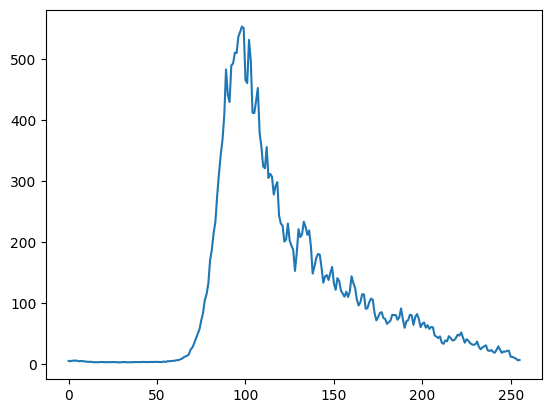

In [16]:
# Checkpoint: here is one example wave plotted out
plt.plot(waves[1000])

In [23]:
# Identify, count and clean from NaN ("Not a Number") values
nan_count = np.isnan(data_normalized).sum()
print(f"Number of NaN values in the array: {nan_count}")
data_cleaned = data_normalized[~np.isnan(data_normalized).any(axis=1)]
flag_cleaned = flag[~np.isnan(data_normalized).any(axis=1)]
waves_cleaned=waves[~np.isnan(data_normalized).any(axis=1)][(flag_cleaned==1)|(flag_cleaned==2)]
print(f"Shape of the cleaned data: {data_cleaned.shape}")
print(f"Spape of the cleaned wave data: {waves_cleaned.shape}")

Number of NaN values in the array: 387
Shape of the cleaned data: (12815, 3)
Spape of the cleaned wave data: (6849, 256)


## 5. Experimental plotting

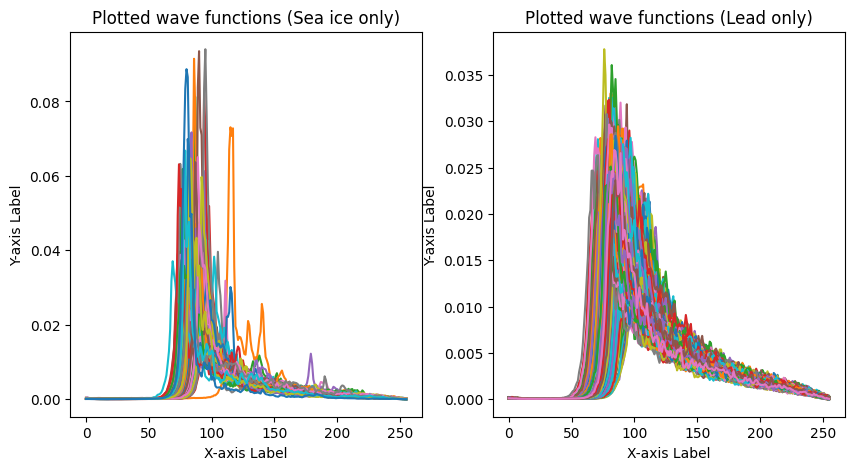

In [34]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Note that ice is 'flag_cleaned==1'
functions_to_plot_ice = waves[~np.isnan(data_normalized).any(axis=1)][(flag_cleaned==1)][::100]  # Ignore NaN values and select every 100th function

# Plot ice functions
for i, function in enumerate(functions_to_plot_ice):
    ax1.plot(function / np.sum(function))  # Divide by the sum of the values

ax1.set_xlabel('X-axis Label')
ax1.set_ylabel('Y-axis Label')
ax1.set_title('Plotted wave functions (Sea ice only)')

# Note that lead is 'flag_cleaned==0'
functions_to_plot_lead = waves[~np.isnan(data_normalized).any(axis=1)][(flag_cleaned==0)][::10]  # Ignore NaN values and select every 10th function

# Plot lead functions
for i, function in enumerate(functions_to_plot_lead):
    ax2.plot(function / np.sum(function))  # Divide by the sum of the values

ax2.set_xlabel('X-axis Label')
ax2.set_ylabel('Y-axis Label')
ax2.set_title('Plotted wave functions (Lead only)')

# Show the figure with both subplots
plt.show()

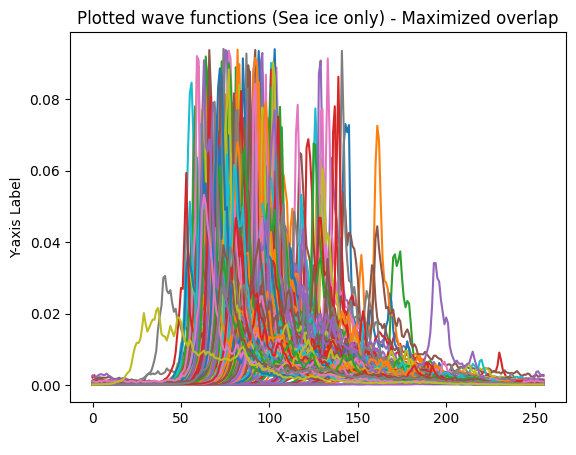

In [ ]:
# Now specify that each wave starts at a similar point on the x_axis, for ease of comparison

# Calculate the average function
average_function = np.mean(functions_to_plot, axis=0)

# Calculate the shift needed for each function to align with the average function
shifts = [np.argmax(np.correlate(average_function, function, mode='full')) - len(average_function) + 1
          for function in functions_to_plot]

# Plot each function with calculated shift
for i, (function, shift) in enumerate(zip(functions_to_plot, shifts)):
    plt.plot(np.roll(function, -shift) / np.sum(function))  # Shift and normalize

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Plotted wave functions (Sea ice only) - Maximized overlap')
plt.show()

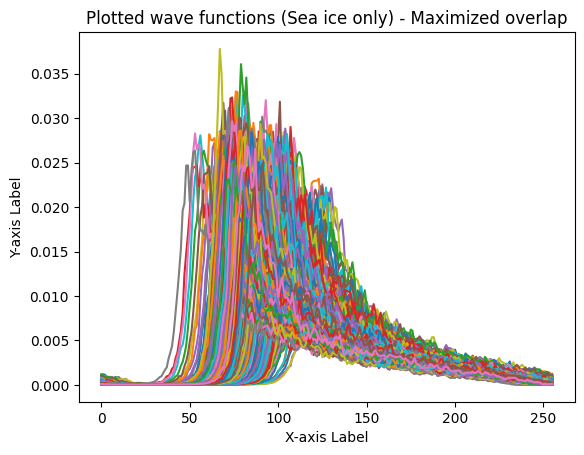

In [ ]:
# Now specify that each wave starts at a similar point on the x_axis, for ease of comparison

# Calculate the average function
average_function = np.mean(functions_to_plot, axis=0)

# Calculate the shift needed for each function to align with the average function
shifts = [np.argmax(np.correlate(average_function, function, mode='full')) - len(average_function) + 1
          for function in functions_to_plot]

# Plot each function with calculated shift
for i, (function, shift) in enumerate(zip(functions_to_plot, shifts)):
    plt.plot(np.roll(function, -shift) / np.sum(function))  # Shift and normalize

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Plotted wave functions (Sea ice only) - Maximized overlap')
plt.show()

Now, let's proceed with running the GMM model as usual. Remember, you have the flexibility to substitute this with K-Means or any other preferred model.

In [37]:
#Ensure to take values that are known to be lead or ice
gmm = GaussianMixture(n_components=2, random_state=0) #2 classes only
gmm.fit(data_cleaned[(flag_cleaned==1)|(flag_cleaned==2)])
clusters_gmm = gmm.predict(data_cleaned[(flag_cleaned==1)|(flag_cleaned==2)])

We can also inspect how many data points are there in each class of your clustering prediction.

In [38]:
unique, counts = np.unique(clusters_gmm, return_counts=True)
class_counts = dict(zip(unique, counts))

print(f'Counted number of ice waveforms: {class_counts [0]}')
print(f'Counted nummber of lead waveforms: {class_counts [1]}')

Counted number of ice waveforms: 5013
Counted nummber of lead waveforms: 1836


In [39]:
# Clean the waves
waves_cleaned=waves[~np.isnan(data_normalized).any(axis=1)][(flag_cleaned==1)|(flag_cleaned==2)]

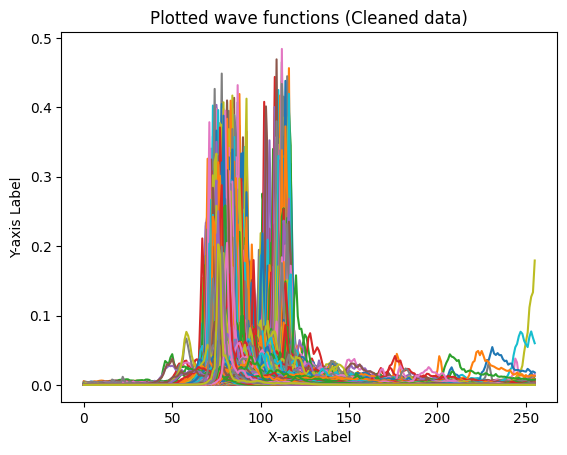

In [40]:
# Clean the waves where waves start at a similar point on the x-axis

min_x_cleaned = min([function.min() for function in waves_cleaned])

# Plot each function after adjusting the x-values
for i, function in enumerate(waves_cleaned):
    plt.plot(np.arange(len(function)) - min_x_cleaned, function/np.sum(function))

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Plotted wave functions (Cleaned data)')
plt.show()

# 6. Confusion Matrix

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5086
         1.0       0.96      1.00      0.98      1763

    accuracy                           0.99      6849
   macro avg       0.98      0.99      0.99      6849
weighted avg       0.99      0.99      0.99      6849



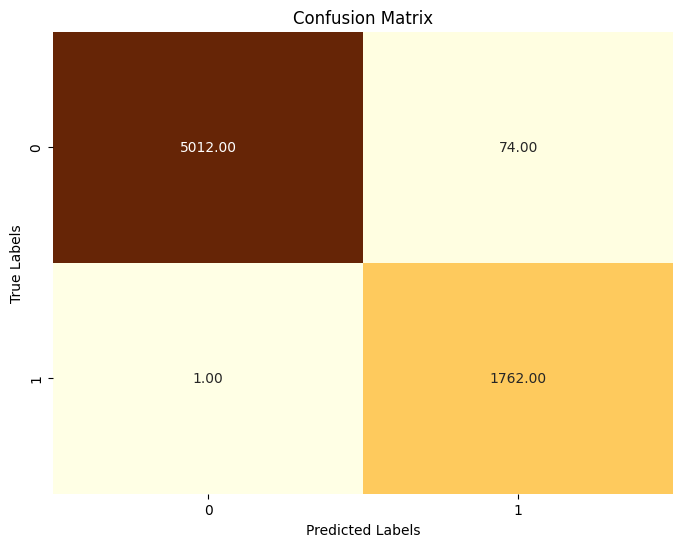

In [55]:
# Import more packages to help with visualisation, accuracy scoring, etc.
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Convert 1=ice and 2=leads to 0 and 1 respectively
flags = flag_cleaned [(flag_cleaned==1) | (flag_cleaned==2)]
flags [flags==1] = 0
flags [flags==2] = 1
# Define the confusion matrix
c = confusion_matrix(flags, clusters_gmm)
# calculate accuracy
acc = accuracy_score(flags, clusters_gmm)
# display classification report
disp = classification_report(flags, clusters_gmm)
print("Classification Report:\n", disp)
# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap (c, annot=True, fmt=".2f", cmap="YlOrBr", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel ("Predicted Labels")
plt. ylabel("True Labels")
plt.show()

# 7. Plot the averages

Orange is lead, blue is ice

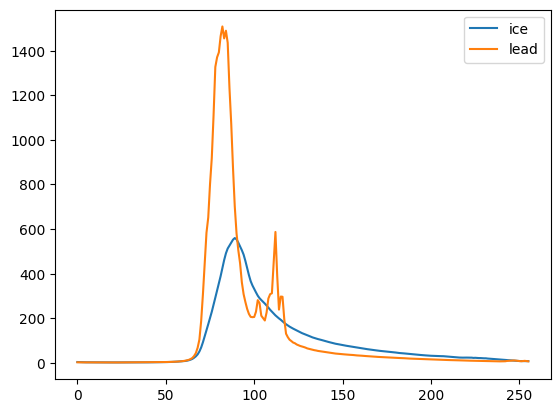

In [ ]:
plt.plot(np.mean(waves_cleaned[clusters_gmm==0],axis=0),label='ice')
plt.plot(np.mean(waves_cleaned[clusters_gmm==1],axis=0),label='lead')
plt.legend()

In [ ]:
#Use 5 classes
gmm = GaussianMixture(n_components=5, random_state=0)
gmm.fit(data_cleaned[(flag_cleaned==1)|(flag_cleaned==2)])
clusters_gmm = gmm.predict(data_cleaned[(flag_cleaned==1)|(flag_cleaned==2)])

In [ ]:
unique, counts = np.unique(clusters_gmm, return_counts=True)
class_counts = dict(zip(unique, counts))

print(class_counts)

{0: 1730, 1: 1086, 2: 2058, 3: 694, 4: 1281}


Test using more waves

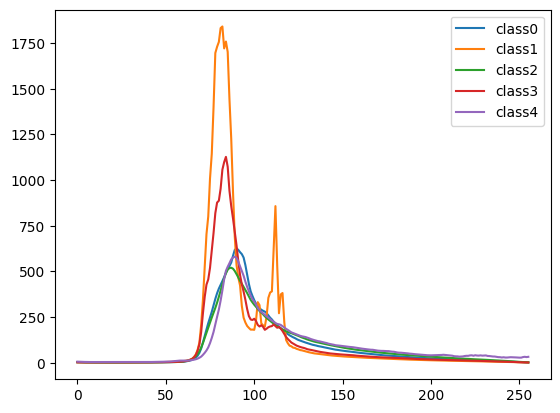

In [ ]:
plt.plot(np.mean(waves_cleaned[clusters_gmm==0],axis=0),label='class0')
plt.plot(np.mean(waves_cleaned[clusters_gmm==1],axis=0),label='class1')
plt.plot(np.mean(waves_cleaned[clusters_gmm==2],axis=0),label='class2')
plt.plot(np.mean(waves_cleaned[clusters_gmm==3],axis=0),label='class3')
plt.plot(np.mean(waves_cleaned[clusters_gmm==4],axis=0),label='class4')
plt.legend()

In [ ]:
gmm = GaussianMixture(n_components=10, random_state=0)
gmm.fit(data_cleaned)
clusters_gmm = gmm.predict(data_cleaned)

In [ ]:
unique, counts = np.unique(clusters_gmm, return_counts=True)
class_counts = dict(zip(unique, counts))

print(class_counts)

{0: 799, 1: 681, 2: 3174, 3: 2066, 4: 1008, 5: 824, 6: 1386, 7: 2011, 8: 365, 9: 501}


# 7. Average echo shape and standard deviation

Use mean squared error and divide by the number of waves:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

functions_to_plot_1 = function  / np.sum(function)  # Normalise the reference function

functions_to_plot = waves[~np.isnan(data_normalised).any(axis=1)][(flag_cleaned==0)][::10] # Repeat for lead later

# Initialize an empty list to store MSE values
mse_values = []

# Plot each function and calculate MSE
for i, function in enumerate(functions_to_plot):
    normalised_function = function / np.sum(function)  # Normalise the function
    plt.plot(normalised_function)
    mse = np.mean((normalised_function - reference_function) ** 2)  # Calculate MSE
    mse_values.append(mse)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Plotted wave functions (Lead only)')
plt.show()

# Calculate standard deviation using MSE values
standard_deviation = np.sqrt(np.mean(mse_values))
print("Standard deviation:", standard_deviation)

NameError: name 'data_normalised' is not defined

Focus on ice

In [ ]:
functions_to_plot = waves[~np.isnan(data_normalized).any(axis=1)][(flag_cleaned==1)][::10]

# Plot each function
for i, function in enumerate(functions_to_plot):
    plt.plot(function/np.sum(function)) # Divide by the sum of the values

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

NameError: name 'waves' is not defined

Leading edge width

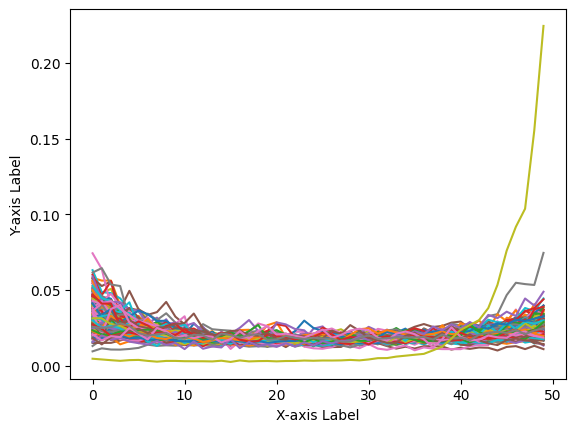

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the leading edge width
leading_edge_width = 50

# Define the functions_to_plot
functions_to_plot = waves[~np.isnan(data_normalized).any(axis=1)][(flag_cleaned==1)][::10]

# Initialize a list to store truncated and aligned waveforms
truncated_aligned_functions = []

# Iterate over each waveform and truncate/align them
for function in functions_to_plot:
    # Find the maximum value index within the leading edge width
    max_value_index = np.argmax(function[:leading_edge_width])
    # Align the waveform by subtracting the max_value_index from each index
    aligned_function = function[max_value_index:]
    # Truncate the aligned waveform to the leading edge width
    truncated_aligned_function = aligned_function[:leading_edge_width]
    # Append the truncated and aligned waveform to the list
    truncated_aligned_functions.append(truncated_aligned_function)

# Plot each truncated and aligned waveform
for i, truncated_aligned_function in enumerate(truncated_aligned_functions):
    plt.plot(truncated_aligned_function / np.sum(truncated_aligned_function))

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

Plot standard deviation

In [ ]:
# I wonder if this code could get the SD
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(functions_to_plot)

NameError: name 'functions_to_plot' is not defined

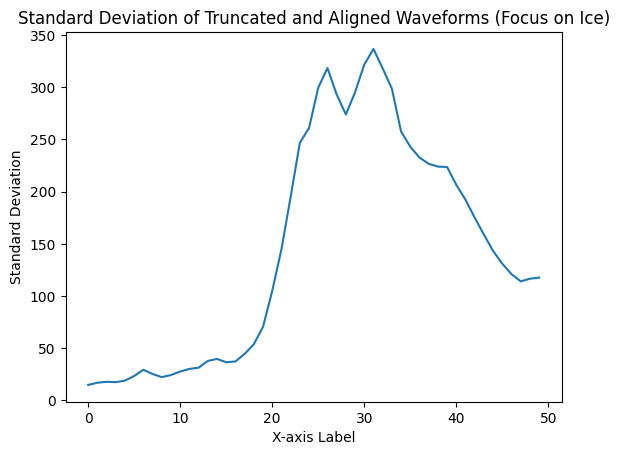

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the leading edge width
leading_edge_width = 50

# Define the functions_to_plot
functions_to_plot = waves[~np.isnan(data_normalized).any(axis=1)][(flag_cleaned==1)][::10]

# Initialize a list to store truncated and aligned waveforms
truncated_aligned_functions = []

# Iterate over each waveform and truncate/align them
for function in functions_to_plot:
    # Find the maximum value index within the leading edge width
    max_value_index = np.argmax(function[:leading_edge_width])
    # Align the waveform by subtracting the max_value_index from each index
    aligned_function = function[max_value_index:]
    # Truncate the aligned waveform to the leading edge width
    truncated_aligned_function = aligned_function[:leading_edge_width]
    # Append the truncated and aligned waveform to the list
    truncated_aligned_functions.append(truncated_aligned_function)

# Compute the standard deviation for each position across all waveforms
standard_deviations = np.std(truncated_aligned_functions, axis=0)

# Plot the standard deviation
plt.plot(standard_deviations)
plt.xlabel('X-axis Label')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Truncated and Aligned Waveforms (Focus on Ice)')
plt.show()


Focussing on leads leading edge width

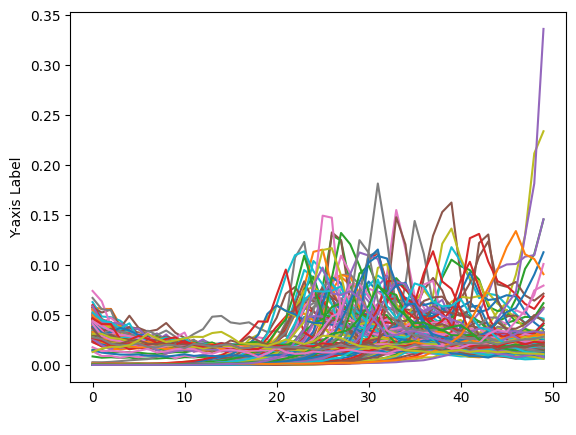

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the leading edge width
leading_edge_width = 50

# Define the functions_to_plot
functions_to_plot = waves[~np.isnan(data_normalized).any(axis=1)][(flag_cleaned==1)][::10]

# Initialize a list to store truncated and aligned waveforms
truncated_aligned_functions = []

# Iterate over each waveform and truncate/align them
for function in functions_to_plot:
    # Find the maximum value index within the leading edge width
    max_value_index = np.argmax(function[:leading_edge_width])
    # Align the waveform by subtracting the max_value_index from each index
    aligned_function = function[max_value_index:]
    # Truncate the aligned waveform to the leading edge width
    truncated_aligned_function = aligned_function[:leading_edge_width]
    # Append the truncated and aligned waveform to the list
    truncated_aligned_functions.append(truncated_aligned_function)

# Plot each truncated and aligned waveform
for i, truncated_aligned_function in enumerate(truncated_aligned_functions):
    plt.plot(truncated_aligned_function / np.sum(truncated_aligned_function))

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

Standard deviation of leads

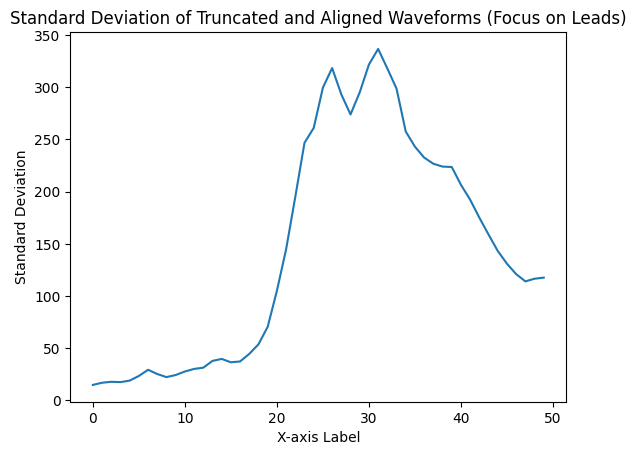

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the leading edge width
leading_edge_width = 50

# Define the functions_to_plot
functions_to_plot = waves[~np.isnan(data_normalized).any(axis=1)][(flag_cleaned==1)][::10]

# Initialize a list to store truncated and aligned waveforms
truncated_aligned_functions = []

# Iterate over each waveform and truncate/align them
for function in functions_to_plot:
    # Find the maximum value index within the leading edge width
    max_value_index = np.argmax(function[:leading_edge_width])
    # Align the waveform by subtracting the max_value_index from each index
    aligned_function = function[max_value_index:]
    # Truncate the aligned waveform to the leading edge width
    truncated_aligned_function = aligned_function[:leading_edge_width]
    # Append the truncated and aligned waveform to the list
    truncated_aligned_functions.append(truncated_aligned_function)

# Compute the standard deviation for each position across all waveforms
standard_deviations = np.std(truncated_aligned_functions, axis=0)

# Plot the standard deviation
plt.plot(standard_deviations)
plt.xlabel('X-axis Label')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Truncated and Aligned Waveforms (Focus on Leads)')
plt.show()


Plot the averages. Orange is lead, blue is ice

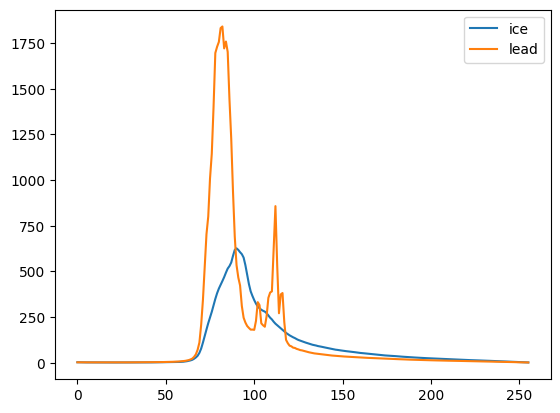

In [ ]:
plt.plot(np.mean(waves_cleaned[clusters_gmm==0],axis=0),label='ice')
plt.plot(np.mean(waves_cleaned[clusters_gmm==1],axis=0),label='lead')
plt.legend()

Plot for comparison

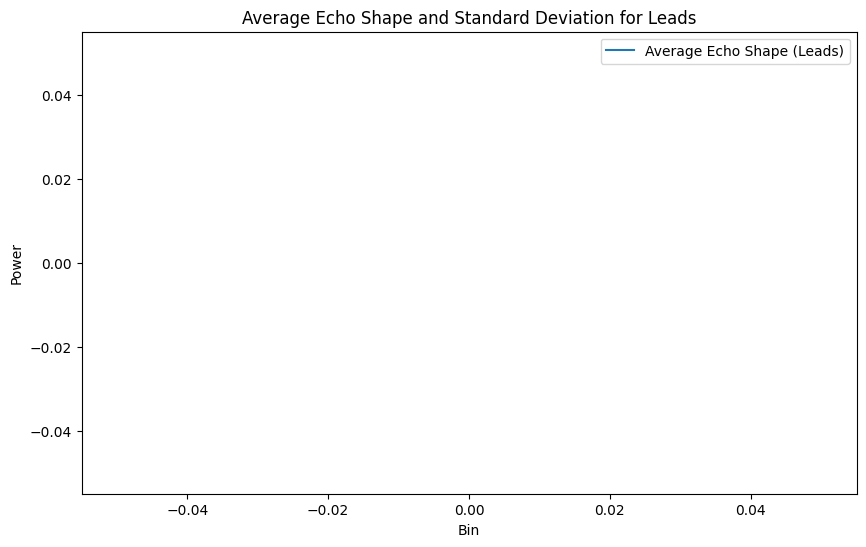

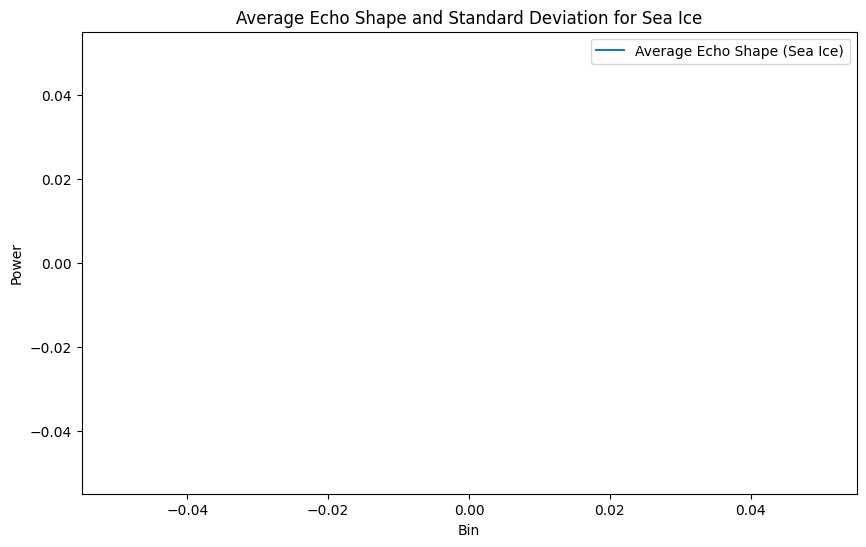

In [ ]:
import matplotlib.pyplot as plt

# Average echo shape for leads
plt.figure(figsize=(10, 6))
plt.plot(average_echo_leads, label='Average Echo Shape (Leads)')
plt.fill_between(range(len(average_echo_leads)), average_echo_leads - std_echo_leads, average_echo_leads + std_echo_leads, alpha=0.2, color='blue')
plt.xlabel('Bin')
plt.ylabel('Power')
plt.title('Average Echo Shape and Standard Deviation for Leads')
plt.legend()
plt.show()

# Average echo shape for sea ice
plt.figure(figsize=(10, 6))
plt.plot(average_echo_sea_ice, label='Average Echo Shape (Sea Ice)')
plt.fill_between(range(len(average_echo_sea_ice)), average_echo_sea_ice - std_echo_sea_ice, average_echo_sea_ice + std_echo_sea_ice, alpha=0.2, color='orange')
plt.xlabel('Bin')
plt.ylabel('Power')
plt.title('Average Echo Shape and Standard Deviation for Sea Ice')
plt.legend()
plt.show()


# 8. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# Assuming 'ground_truth_waveforms' and 'predicted_waveforms' are your ground truth and predicted waveforms, respectively
ground_truth_waveforms = # Input the ESA official classification
predicted_waveforms = functions_to_plot

# Reshape the waveforms into 1D arrays
ground_truth_flat = ground_truth_waveforms.flatten()
predicted_flat = predicted_waveforms.flatten()

# Convert the waveforms to binary labels based on some threshold
threshold = 0.5  # Adjust this threshold as per your requirement
ground_truth_labels = (ground_truth_flat > threshold).astype(int)
predicted_labels = (predicted_flat > threshold).astype(int)

# Calculate confusion matrix, accuracy, and classification report
conf_mat = confusion_matrix(ground_truth_labels, predicted_labels)
accuracy = accuracy_score(ground_truth_labels, predicted_labels)
report = classification_report(ground_truth_labels, predicted_labels)

print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display accuracy
print(f"Accuracy: {accuracy:.2f}")


SyntaxError: invalid syntax (<ipython-input-1-fa76c357764d>, line 5)